In [1]:
%matplotlib ipympl
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import pickle

In [2]:
data = pd.read_csv('./final_data.csv', index_col='count')
data = np.array(data)

data0 = np.array([row[0:4] for row in data if row[4]==0])
data1 = np.array([row[0:4] for row in data if row[4]==1])

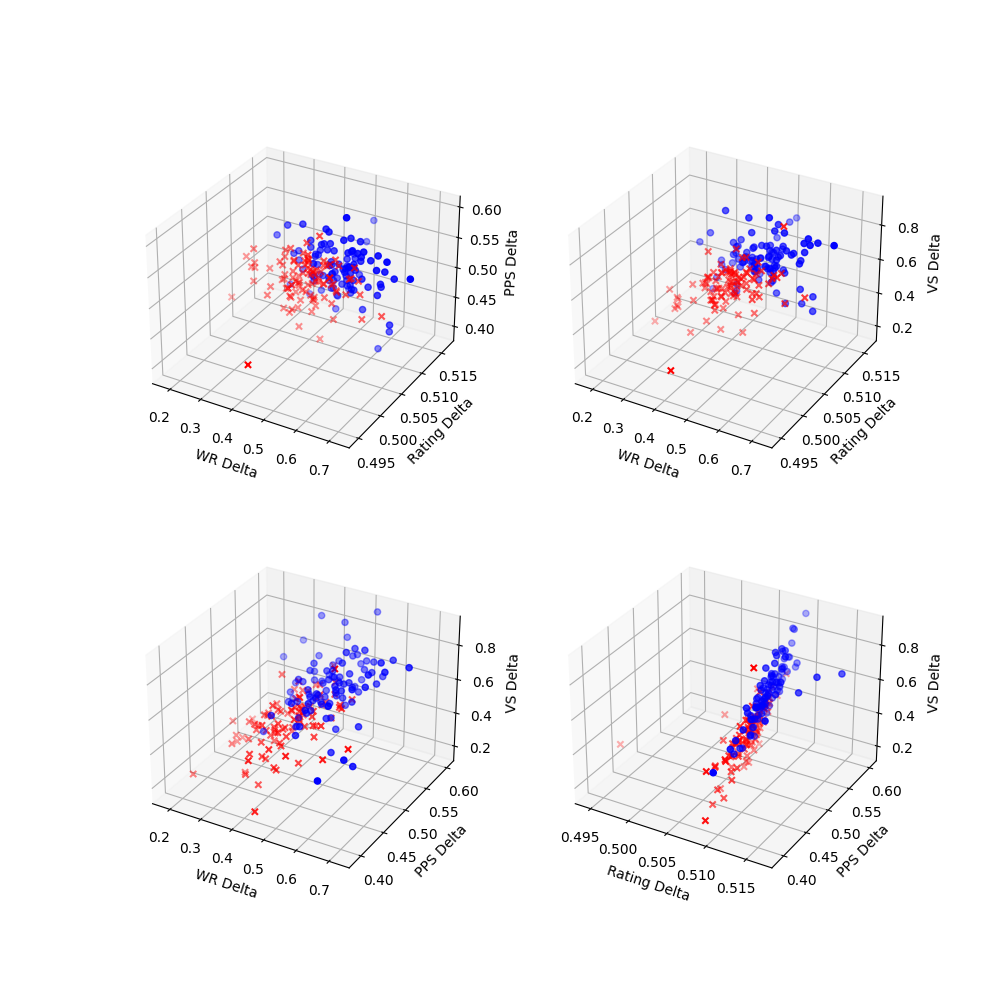

In [3]:
with open('match_predict_model.pkl', 'rb') as f:
    model = pickle.load(f)

w = model.w
b = model.b

def f(x, y, z):
    arr = np.array([x,y,z])
    f_wb = np.dot(arr, w[0:3]) + b

    return 1 / (1 + np.exp(-f_wb))

x = y = z = np.arange(0.0, 1.0, 0.01)
X, Y, Z = np.meshgrid(x, y, z)
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(2,2,1, projection='3d')
ax.grid()
ax.scatter(data0[0:100,0], data0[0:100,1], data0[0:100,2], c='b', marker='o')
ax.scatter(data1[0:100,0], data1[0:100,1], data1[0:100,2], c='r', marker='x')
ax.set_xlabel("WR Delta")
ax.set_ylabel("Rating Delta")
ax.set_zlabel("PPS Delta")
ax = fig.add_subplot(2, 2, 2, projection='3d')
ax.scatter(data0[0:100,0], data0[0:100,1], data0[0:100,3], c='b', marker='o')
ax.scatter(data1[0:100,0], data1[0:100,1], data1[0:100,3], c='r', marker='x')
ax.set_xlabel("WR Delta")
ax.set_ylabel("Rating Delta")
ax.set_zlabel("VS Delta")
ax = fig.add_subplot(2, 2, 3, projection='3d')
ax.scatter(data0[0:100,0], data0[0:100,2], data0[0:100,3], c='b', marker='o')
ax.scatter(data1[0:100,0], data1[0:100,2], data1[0:100,3], c='r', marker='x')
ax.set_xlabel("WR Delta")
ax.set_ylabel("PPS Delta")
ax.set_zlabel("VS Delta")
ax = fig.add_subplot(2, 2, 4, projection='3d')
ax.scatter(data0[0:100,1], data0[0:100,2], data0[0:100,3], c='b', marker='o')
ax.scatter(data1[0:100,1], data1[0:100,2], data1[0:100,3], c='r', marker='x')
ax.set_xlabel("Rating Delta")
ax.set_ylabel("PPS Delta")
ax.set_zlabel("VS Delta")
plt.show()